In [1]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import numpy  as np
import seaborn as sns
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
path = './data/'
plt.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
pd.options.display.max_columns = 350
pd.options.display.max_rows = 999

In [2]:
sigungu = pd.read_csv(path+'시군구별지역안전지표_2015.csv', encoding='cp949')

## 데이터모양확인 및 split

In [3]:
sigungu.shape

(226, 311)

In [4]:
sigungu_y= sigungu.iloc[:,-7:]
sigungu_x= sigungu.iloc[:,4:-7]
sigungu_name = sigungu.iloc[:,:4]

In [5]:
sigungu_y.shape, sigungu_x.shape, sigungu_name.shape

((226, 7), (226, 300), (226, 4))

## 결측치처리
기존 sido와 sigungu의 모양을 확인해보고, 결측치를 처리한다.

모두 NaN값인 열은 아예없애고

20%이상의 결측 열은 지운다.

행을 지워야할(제주) 필요가 있을까..? 어쨌든 전국을 살피는건데. 이후순서로 빼자.

과거의 경향성으로 결측을 채울 수 있는지 살핀다.

In [6]:
#현재 sigungu의 모양을 보자
#결측치 위치(msno.matrix, isnull())
#결측치 갯수(msno.bar, isnull().sum())
#pd.concat으로 _name을 연결, 어느 위치인지 확인해볼 것 (그게 isnull()인가?)

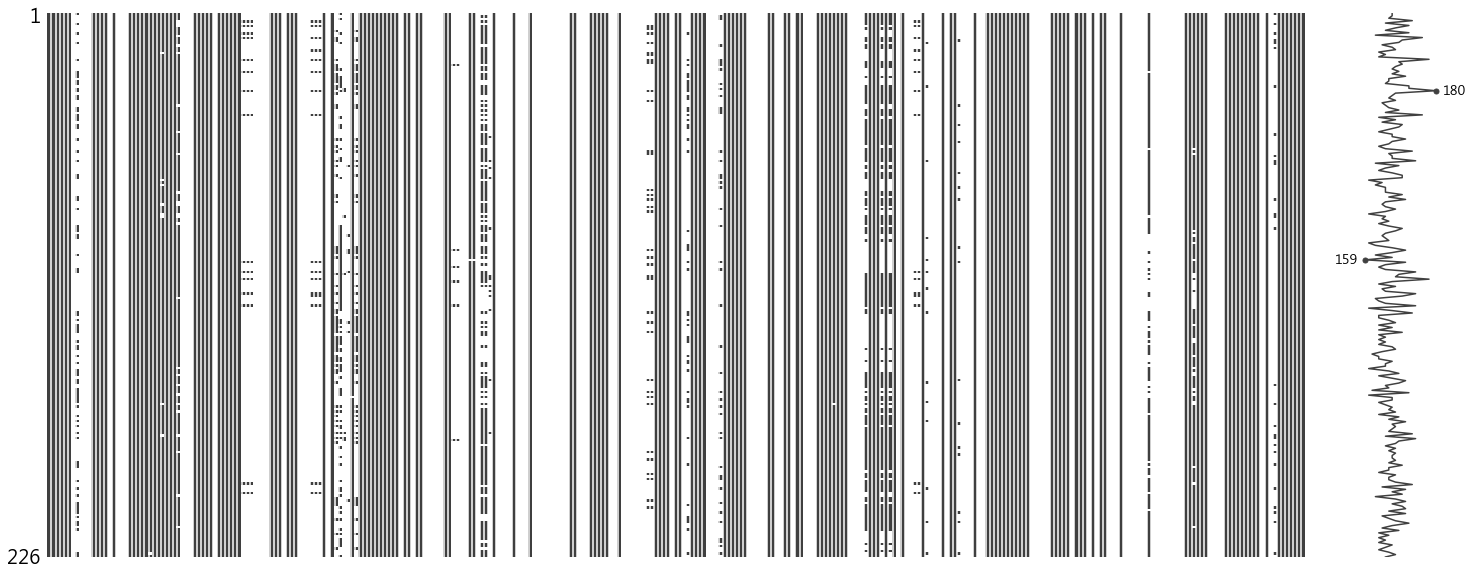

In [7]:
msno.matrix(sigungu)

In [8]:
# sigungu_name_scaled = pd.concat([sigungu_name,sigungu_x],axis=1)

In [9]:
sigungu_nullax1 = pd.DataFrame(data = sigungu_x.notnull().sum(axis=0), columns={'data'} )
sigungu_nullax1['결측비율']=round(sigungu_nullax1.data/(len(sigungu_x)),2)
# sido_nullax1.reset_index(inplace=True)
sigungu_nullax1
#모든 시도에 대해 NaN인 열은 삭제한다.data가 0인경우 dropna(how='all')
#80%이상 결측인 열은 삭제한다.
#이전 자료로 결측을 채울 수 있는지 확인한다.

,data,결측비율
1인가구수,226,1.00
5대범죄 발생건수,226,1.00
가로등수,0,0.00
가스공급설비 면적,83,0.37
가스사고 발생건수,0,0.00
가스사고 부상자수,0,0.00
가스사고 사망자수,0,0.00
가스사고발생건수,226,1.00
가해(타살) 사망자수,226,1.00
감염병 발생건수,226,1.00


In [10]:
df = pd.DataFrame(data = sigungu_x.notnull().sum(axis=1), columns={'data'} )
sigungu_nullax0 = pd.concat([sigungu_name.시군구, df], axis=1)
sigungu_nullax0['결측비율']=round(sigungu_nullax0.data/sigungu_x.shape[1],2)
sigungu_nullax0

,시군구,data,결측비율
0,강릉시,156,0.52
1,고성군,156,0.52
2,동해시,155,0.52
3,삼척시,162,0.54
4,속초시,154,0.51
5,양구군,161,0.54
6,양양군,157,0.52
7,영월군,154,0.51
8,원주시,161,0.54
9,인제군,151,0.50


In [11]:
len(sigungu_nullax1.loc[(sigungu_nullax1.결측비율==0)])
len(sigungu_nullax1.loc[(sigungu_nullax1.결측비율==1)])
len(sigungu_nullax1.loc[(sigungu_nullax1.결측비율!=0)&(sigungu_nullax1.결측비율!=1)])

33

In [12]:
df = sigungu_nullax1.loc[(sigungu_nullax1.결측비율!=0)&(sigungu_nullax1.결측비율!=1)]

In [13]:
df.sort_values(by='data',ascending=False)

,data,결측비율
교통문화지수,218,0.96
교통사고사망자수(고속도로),200,0.88
하천연장,193,0.85
폐기물 처리시설수,178,0.79
산불발생건수,152,0.67
산불피해면적,152,0.67
자연재해 피해자수,136,0.60
자연재해 피해액,136,0.60
자연재해 발생건수,136,0.60
방재지구 면적,98,0.43


In [14]:
df.loc[df.data==16].index

Index(['레저(생활체육)사고 발생건수', '레저(생활체육)사고 부상자수', '레저(생활체육)사고 사망자수', '저수지 저수용량'], dtype='object')

In [ ]:
msno.matrix(df3)

In [ ]:
df2 = sido_x_scaled.loc[:,df.loc[df.data==14].index]
df3 = pd.concat([sido_name,df2],axis=1)
df3

In [ ]:
msno.matrix(df3)
#야간산불관련: '산불'범주에 포함되는것으로 간주(산불건수(17), 산불피해면적(16))
#자연재해관련: 자연재해(10년평균)변수들이 모두 살아있음(17)

In [ ]:
df2 = sido_x_scaled.loc[:,df.loc[df.data==13].index]
df3 = pd.concat([sido_name,df2],axis=1)
df3

In [ ]:
msno.matrix(df3)
#방수, 배수는 상관계수가 높은 자연재해지표로 유사측정될 수 있을것임
#과거 기록 없음

In [ ]:
df2 = sido_x_scaled.loc[:,df.loc[df.data==10].index]
df3 = pd.concat([sido_name,df2],axis=1)
df3

In [ ]:
msno.matrix(df3)
#50%이상은 채울 수 없음